In [ ]:
import os  
import string  
import numpy as np  
from sklearn.feature_extraction.text import CountVectorizer  

#load function
def load_imdb_data(directory):
    texts, labels = [], []
    for label in ['pos', 'neg']:
        folder_path = os.path.join(directory, label)
        for file_name in os.listdir(folder_path):
            with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
                texts.append(file.read())  
                labels.append(1 if label == 'pos' else 0)  # Αν είναι "pos", προσθέτουμε 1, αλλιώς 0
    return texts, np.array(labels)  # Επιστρέφουμε τις κριτικές και τις ετικέτες τους

#clean function 
def clean_text(text):
    text = text.lower()  # Μετατροπή σε πεζά
    text = text.translate(str.maketrans('', '', string.punctuation))  # Αφαίρεση σημείων στίξης
    return text

imdb_path = "C:\\Users\\stroz\\Downloads\\aclImdb_v1\\aclImdb\\train"
texts, labels = load_imdb_data(imdb_path)  
texts = [clean_text(text) for text in texts]  





In [ ]:
#code for word frequency
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)  
X = vectorizer.fit_transform(texts)  
vocab = vectorizer.get_feature_names_out()  
word_doc_freq = np.asarray(X.sum(axis=0)).flatten()
word_freq = dict(zip(vocab, word_doc_freq))
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
# Εκτύπωση των 70 πιο συχνών λέξεων
print("70 πιο συχνές λέξεις:", sorted_words[:70])
#Εκτύπωση των πιο σπάνιων λέξεων
print("200 πιο σπάνιες λέξεις:", sorted_words[-200:])

70 πιο συχνές λέξεις: [('the', 24790), ('and', 24127), ('of', 23720), ('to', 23458), ('this', 22593), ('is', 22411), ('in', 21986), ('it', 21194), ('that', 19998), ('for', 17819), ('but', 17737), ('with', 17420), ('was', 16146), ('as', 16075), ('on', 15571), ('movie', 14995), ('not', 14810), ('br', 14666), ('have', 14170), ('be', 14059), ('are', 13879), ('one', 13791), ('film', 13558), ('at', 12896), ('you', 12813), ('all', 12801), ('its', 12327), ('an', 12185), ('from', 11674), ('by', 11668), ('so', 11472), ('like', 11440), ('who', 11057), ('his', 10656), ('if', 10604), ('just', 10494), ('about', 10442), ('out', 10311), ('they', 10308), ('or', 10207), ('has', 10031), ('he', 9812), ('some', 9608), ('what', 9569), ('there', 9555), ('good', 9408), ('when', 8995), ('more', 8984), ('very', 8637), ('even', 8346), ('only', 8311), ('time', 8266), ('up', 8177), ('my', 8087), ('no', 8005), ('would', 7994), ('see', 7953), ('can', 7830), ('really', 7597), ('which', 7484), ('had', 7433), ('story',

In [ ]:
#removing the n-most frequent and the k-most rare words
n = 70  # Αφαίρεση των 70 πιο συχνών λέξεων
k = 200  # Αφαίρεση των 200 πιο σπάνιων λέξεων
#Βρίσκουμε τις n πιο συχνές λέξεις
most_common_words = {word for word, freq in sorted_words[:n]}
# Βρίσκουμε τις k πιο σπάνιες λέξεις
least_common_words = {word for word, freq in sorted_words[-k:]}
#Τελικό φιλτραρισμένο λεξιλόγιο
filtered_vocab = [word for word in vocab if word not in most_common_words and word not in least_common_words]
#Ταξινόμηση του λεξιλογίου κατά συχνότητα (από πιο συχνή προς λιγότερο συχνή)
filtered_vocab = sorted(filtered_vocab, key=lambda word: word_freq[word], reverse=True)
#Ενημερώνουμε τον vectorizer με το νέο λεξιλόγιο
vectorizer = CountVectorizer(binary=True, vocabulary=filtered_vocab)
X_filtered = vectorizer.fit_transform(texts)  # Μετατροπή κειμένων σε διανύσματα με το νέο λεξιλόγιο
print("Νέο μέγεθος λεξιλογίου:", len(filtered_vocab))

Νέο μέγεθος λεξιλογίου: 120404
70 πιο συχνές λέξεις στο νέο λεξιλόγιο: ['been', 'do', 'most', 'into', 'also', 'her', 'dont', 'first', 'how', 'great', 'will', 'because', 'made', 'people', 'make', 'could', 'way', 'any', 'bad', 'after', 'then', 'too', 'we', 'movies', 'them', 'think', 'watch', 'acting', 'seen', 'characters', 'she', 'films', 'many', 'being', 'him', 'never', 'plot', 'two', 'little', 'best', 'know', 'where', 'did', 'ever', 'character', 'does', 'better', 'still', 'end', 'love', 'say', 'off', 'life', 'over', 'your', 'these', 'go', 'while', 'here', 'should', 'such', 'something', 'through', 'scenes', 'why', 'back', 'watching', 'those', 'im', 'scene']


In [72]:
#selecting the m-most valuable words considering IG 
#using  Scikit-learn code for IG
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif  # Θα το χρησιμοποιήσουμε  για το πληροφοριακό κέρδος

ig_values = mutual_info_classif(X_filtered, labels, discrete_features=True)
ig_scores = dict(zip(filtered_vocab, ig_values))  # Φτιάχνουμε λεξικό τύπου λέξη -> IG
m = 10000  
top_m_words = sorted(ig_scores, key=ig_scores.get, reverse=True)[:m]
#Ενημέρωση του vectorizer
vectorizer = CountVectorizer(binary=True, vocabulary=top_m_words)
X_final = vectorizer.fit_transform(texts)
print("Νέο λεξιλόγιο:", len(top_m_words))
print("100 πιο σημαντικές λέξεις:", top_m_words[:100])



Νέο λεξιλόγιο: 10000
100 πιο σημαντικές λέξεις: ['bad', 'worst', 'waste', 'awful', 'great', 'excellent', 'terrible', 'worse', 'stupid', 'wonderful', 'boring', 'horrible', 'nothing', 'best', 'poor', 'minutes', 'supposed', 'crap', 'poorly', 'perfect', 'plot', 'lame', 'love', 'amazing', 'acting', 'beautiful', 'ridiculous', 'pointless', 'money', 'favorite', 'script', 'loved', 'dont', 'avoid', 'superb', 'wasted', 'dull', 'annoying', 'highly', 'badly', 'laughable', 'mess', 'oh', 'also', 'brilliant', 'fantastic', 'thing', 'any', 'redeeming', 'pathetic', 'why', 'unless', 'performance', 'cheap', 'both', 'beautifully', 'always', 'instead', 'wonderfully', 'fails', 'today', 'unfunny', '810', 'least', '410', 'couldnt', '1010', 'could', 'garbage', 'performances', 'save', 'reason', 'enjoyed', 'touching', '710', 'decent', 'life', 'make', 'young', 'anything', 'unfortunately', 'excuse', '310', 'terrific', 'world', 'didnt', 'powerful', 'predictable', 'perfectly', 'dumb', 'heart', 'im', 'outstanding', 'fa

In [ ]:
#Naïve Bayes implementation
import numpy as np
class NaïveBayes:
 
  def __init__(self,laplace):
    self.laplace = laplace
    self.class_probs = {} #P(y)
    self.word_probs= {} #P(x|y)
      

  def fit(self,X,y):
    texts = X.shape[0]
    features = X.shape[1]
    for c in np.unique(y): 
     self.class_probs[c] = np.mean(y==c) #P(y) 
     indices = np.where(y == c)[0]
     X_c = X[indices].toarray()
     word_count = np.sum(X_c, axis=0)  # Πόσα κείμενα περιέχουν κάθε λέξη στην κατηγορία c
     self.word_probs[c] = (word_count + self.laplace) / (X_c.shape[0] + 2 * self.laplace)  # P(x|y) με Laplace εκτιμήτρια
  
  def predict(self, X):
      n_samples = X.shape[0]
      predictions = []
      X_dense = X.toarray()
      
      for i in range(n_samples):  
            log_probs = {}
            for c in self.class_probs:  # Υπολογίζουμε P(y|X) για κάθε κλάση
                log_prob = np.log(self.class_probs[c])  
                #χρησιμοποιούμε λογαρίθμους για να αποφύγουμε το underflow λόγω μικρών πιθανοτήτων
                log_prob += np.sum(X_dense[i] * np.log(self.word_probs[c]))  
                log_prob += np.sum((1 - X_dense[i]) * np.log(1 - self.word_probs[c]))  
                log_probs[c] = log_prob  # Αποθηκεύουμε τη συνολική πιθανότητα για κάθε κατηγορία

            # Επιλέγουμε την κλάση με τη μεγαλύτερη πιθανότητα
            predictions.append(max(log_probs, key=log_probs.get))

      return np.array(predictions)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# split initial data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_final, labels, test_size=0.2, random_state=42)

# split rest of the train data into train and dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
#split result 70%-20%-10%(train-test-dev)
# # Δημιουργούμε λίστες με ποσοστά των δεδομένων εκπαίδευσης που θα χρησιμοποιούμε
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

train_precisions, train_recalls, train_f1s = [], [], []
dev_precisions, dev_recalls, dev_f1s = [], [], []

for size in train_sizes:
    # Επιλέγουμε το αντίστοιχο ποσοστό των δεδομένων εκπαίδευσης
    subset_size = size * X_train.shape[0]
    X_epanalipsis = X_train[:int(subset_size)]
    y_epanalipsis = y_train[:int(subset_size)]

    # Εκπαίδευση του Naïve Bayes
    nb = NaïveBayes(1.0)
    nb.fit(X_epanalipsis, y_epanalipsis)

    # Προβλέψεις στο Training Set (για όσα χρησιμοποιήσαμε σε αυτή την επανάληψη)
    y_train_pred = nb.predict(X_epanalipsis)

    # Προβλέψεις στο Development Set (πάντα στο ίδιο X_dev)
    y_dev_pred = nb.predict(X_dev)

    # Υπολογισμός Precision, Recall, F1-score για τα Training Data
    train_precisions.append(precision_score(y_epanalipsis, y_train_pred, pos_label=1))
    train_recalls.append(recall_score(y_epanalipsis, y_train_pred, pos_label=1))
    train_f1s.append(f1_score(y_epanalipsis, y_train_pred, pos_label=1))

    # Υπολογισμός Precision, Recall, F1-score για τα Development Data (ΞΕΧΩΡΙΣΤΑ για κάθε size)
    dev_precisions.append(precision_score(y_dev, y_dev_pred, pos_label=1))
    dev_recalls.append(recall_score(y_dev, y_dev_pred, pos_label=1))
    dev_f1s.append(f1_score(y_dev, y_dev_pred, pos_label=1))

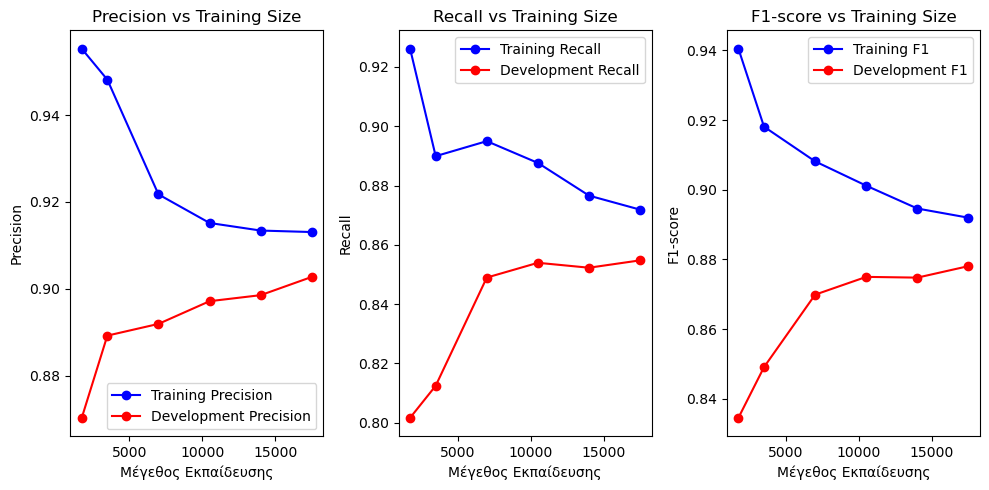

In [ ]:
import matplotlib.pyplot as plt

#Σχεδίαση των καμπύλων μάθησης
plt.figure(figsize=(10, 5))
total_samples = X_train.shape[0]
train_sizes = [int(size * total_samples) for size in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]]

#Precision
plt.subplot(1, 3, 1)  
plt.plot(train_sizes, train_precisions, label="Training Precision", marker="o", color="blue")
plt.plot(train_sizes, dev_precisions, label="Development Precision", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision vs Training Size")

#Recall
plt.subplot(1, 3, 2)  
plt.plot(train_sizes, train_recalls, label="Training Recall", marker="o", color="blue")
plt.plot(train_sizes, dev_recalls, label="Development Recall", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall vs Training Size")

#F1-score
plt.subplot(1, 3, 3)  
plt.plot(train_sizes, train_f1s, label="Training F1", marker="o", color="blue")
plt.plot(train_sizes, dev_f1s, label="Development F1", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης")
plt.ylabel("F1-score")
plt.legend()
plt.title("F1-score vs Training Size")

plt.tight_layout()  
plt.show()


In [8]:
from sklearn.metrics import classification_report,precision_recall_fscore_support
import pandas as pd
# Εκπαίδευση του μοντέλου χρησιμοποιώντας ΟΛΑ τα δεδομένα εκπαίδευσης
nb = NaïveBayes(1.0)
nb.fit(X_train, y_train)
y_test_pred = nb.predict(X_test)
# Υπολογισμός μετρικών (Precision, Recall, F1)
report = classification_report(y_test, y_test_pred, output_dict=True)
#calculating micro-average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    y_test, y_test_pred, average='micro')

# Δημιουργία ενός dictionary για το micro average
micro_avg = {
    'precision': micro_precision,
    'recall': micro_recall,
    'f1-score': micro_f1,
    'support': len(y_test)  
}

# Ενημέρωση του report με το micro average
report['micro avg'] = micro_avg
# Μετατροπή σε DataFrame για πιο ευανάγνωστο πίνακα
df_report = pd.DataFrame(report).transpose()
# Εμφάνιση αποτελεσμάτων
print(df_report)



              precision    recall  f1-score   support
0              0.860983  0.902213  0.881116  2485.000
1              0.898581  0.856064  0.876807  2515.000
accuracy       0.879000  0.879000  0.879000     0.879
macro avg      0.879782  0.879138  0.878962  5000.000
weighted avg   0.879895  0.879000  0.878949  5000.000
micro avg      0.879000  0.879000  0.879000  5000.000


In [ ]:
import numpy as np

class LogisticRegressionSGA:
    def __init__(self, lr=0.001, epochs=10, reg_lambda=0.001):
        self.lr = lr                  # Ρυθμός μάθησης
        self.epochs = epochs          # Αριθμός εποχών
        self.reg_lambda = reg_lambda  # Ομαλοποίηση L2
        self.weights = None           # Βάρη (θα τα αρχικοποιήσουμε αργότερα)
        self.bias = 0                 # Συνεχής όρος (bias)
    
    def sigmoid(self, z):
        z = np.array(z)
        return 1 / (1 + np.exp(-z))
    
    def cross_entropy_loss(self, X, y):
        m = len(y)
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        reg_term = (self.reg_lambda / (2 * m)) * np.sum(self.weights ** 2)  # L2 κανονικοποίηση
        return loss + reg_term

    def fit(self, X, y):
       
        X = X.toarray()  #Μετατροπή από sparse matrix σε numpy array
        m, n = X.shape  # Αριθμός δειγμάτων & χαρακτηριστικών
        self.weights = np.zeros(n)  
        
        for epoch in range(self.epochs):
            for i in range(m):
                xi = X[i]  # Επιλογή ενός δείγματος κάθε φορά
                yi = y[i]
                linear_model = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(linear_model)
                error = y_pred - yi
                self.weights -= self.lr * (error * xi + self.reg_lambda * self.weights)
                self.bias -= self.lr * error 
            
           
    def predict(self, X):
        X = X.toarray()
        probabilities = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return (probabilities >= 0.5).astype(int)  # Αν > 0.5 → 1, αλλιώς → 0
    


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

train_precisions, train_recalls, train_f1s = [], [], []
dev_precisions, dev_recalls, dev_f1s = [], [], []

for size in train_sizes:
    subset_size = size * X_train.shape[0]
    X_epanalipsis = X_train[:int(subset_size)]
    y_epanalipsis = y_train[:int(subset_size)]
    lrObj = LogisticRegressionSGA()
    lrObj.fit(X_epanalipsis,y_epanalipsis)
    y_train_pred = lrObj.predict(X_epanalipsis)
    y_dev_pred = lrObj.predict(X_dev)

    # Υπολογισμός Precision, Recall, F1-score για τα Training Data
    train_precisions.append(precision_score(y_epanalipsis, y_train_pred, pos_label=1))
    train_recalls.append(recall_score(y_epanalipsis, y_train_pred, pos_label=1))
    train_f1s.append(f1_score(y_epanalipsis, y_train_pred, pos_label=1))

    # Υπολογισμός Precision, Recall, F1-score για τα Development Data (ΞΕΧΩΡΙΣΤΑ για κάθε size)
    dev_precisions.append(precision_score(y_dev, y_dev_pred, pos_label=1))
    dev_recalls.append(recall_score(y_dev, y_dev_pred, pos_label=1))
    dev_f1s.append(f1_score(y_dev, y_dev_pred, pos_label=1))

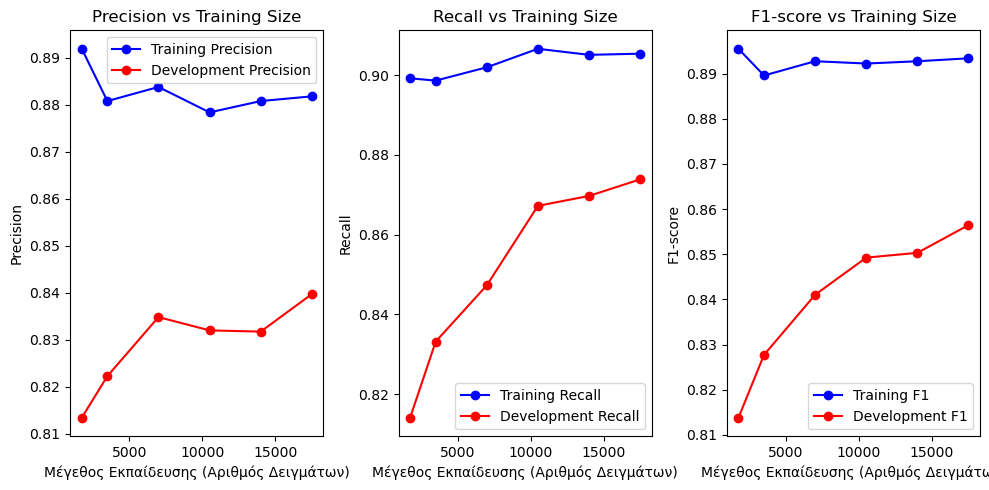

In [ ]:
import matplotlib.pyplot as plt

# Σχεδίαση των καμπύλων μάθησης
plt.figure(figsize=(10, 5))
total_samples = X_train.shape[0]
train_sizes = [int(size * total_samples) for size in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]]

# Precision
plt.subplot(1, 3, 1)
plt.plot(train_sizes, train_precisions, label="Training Precision", marker="o", color="blue")
plt.plot(train_sizes, dev_precisions, label="Development Precision", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης (Αριθμός Δειγμάτων)")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision vs Training Size")

#Recall
plt.subplot(1, 3, 2)
plt.plot(train_sizes, train_recalls, label="Training Recall", marker="o", color="blue")
plt.plot(train_sizes, dev_recalls, label="Development Recall", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης (Αριθμός Δειγμάτων)")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall vs Training Size")

#F1-score
plt.subplot(1, 3, 3)
plt.plot(train_sizes, train_f1s, label="Training F1", marker="o", color="blue")
plt.plot(train_sizes, dev_f1s, label="Development F1", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης (Αριθμός Δειγμάτων)")
plt.ylabel("F1-score")
plt.legend()
plt.title("F1-score vs Training Size")
plt.tight_layout() 
plt.show()


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
import pandas as pd


lr = LogisticRegressionSGA()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# Υπολογισμός Precision, Recall, F1-score για κάθε κατηγορία
report = classification_report(y_test, y_test_pred, output_dict=True)

# Υπολογισμός micro-average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    y_test, y_test_pred, average='micro'
)

# Δημιουργία dictionary για το micro average
micro_avg = {
    'precision': micro_precision,
    'recall': micro_recall,
    'f1-score': micro_f1,
    'support': len(y_test)  
}

report['micro avg'] = micro_avg
df_report = pd.DataFrame(report).transpose() 
print(df_report)




              precision    recall  f1-score    support
0              0.883299  0.861972  0.872505  2485.0000
1              0.866796  0.887475  0.877014  2515.0000
accuracy       0.874800  0.874800  0.874800     0.8748
macro avg      0.875048  0.874723  0.874759  5000.0000
weighted avg   0.874998  0.874800  0.874773  5000.0000
micro avg      0.874800  0.874800  0.874800  5000.0000


In [68]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from collections import Counter

class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []

        for i in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, random_state=self.random_state)
            tree = DecisionTreeClassifier(criterion="entropy", max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        final_predictions = [Counter(predictions[:, i]).most_common(1)[0][0] for i in range(X.shape[0])]
        return np.array(final_predictions)




train_precisions, train_recalls, train_f1s = [], [], []
dev_precisions, dev_recalls, dev_f1s = [], [], []

for size in train_sizes:
    subset_size = int(size * X_train.shape[0])
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    rf = RandomForest(n_estimators=100, max_depth=15)  
    rf.fit(X_subset, y_subset)
    y_train_pred = rf.predict(X_subset)
    y_dev_pred = rf.predict(X_dev)

    # Υπολογισμός Precision, Recall, F1-score για τα Training Data
    train_precisions.append(precision_score(y_subset, y_train_pred, pos_label=1))
    train_recalls.append(recall_score(y_subset, y_train_pred, pos_label=1))
    train_f1s.append(f1_score(y_subset, y_train_pred, pos_label=1))

    # Υπολογισμός Precision, Recall, F1-score για τα Development Data 
    dev_precisions.append(precision_score(y_dev, y_dev_pred, pos_label=1))
    dev_recalls.append(recall_score(y_dev, y_dev_pred, pos_label=1))
    dev_f1s.append(f1_score(y_dev, y_dev_pred, pos_label=1))



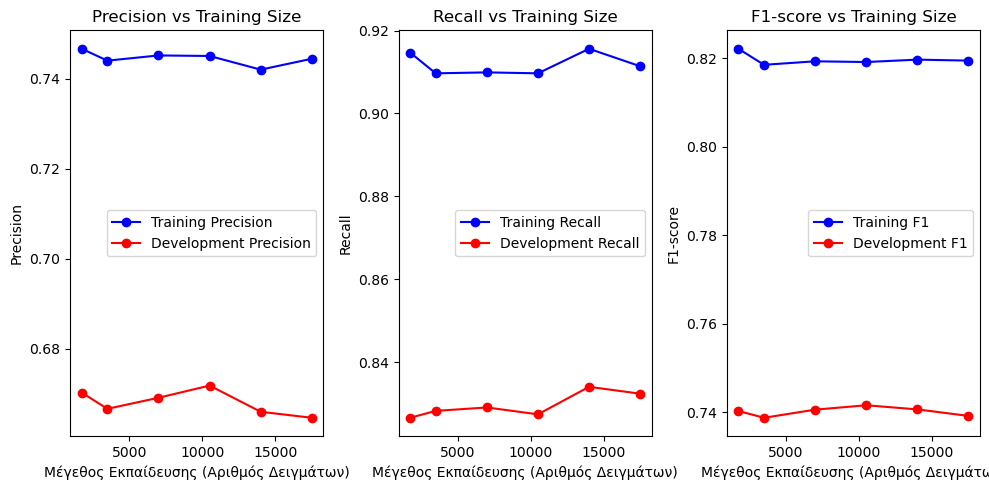

In [69]:

# Σχεδίαση των καμπύλων μάθησης
plt.figure(figsize=(10, 5))
total_samples = X_train.shape[0]
train_sizes = [int(size * total_samples) for size in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]]

# Precision
plt.subplot(1, 3, 1)
plt.plot(train_sizes, train_precisions, label="Training Precision", marker="o", color="blue")
plt.plot(train_sizes, dev_precisions, label="Development Precision", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης (Αριθμός Δειγμάτων)")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision vs Training Size")

# Recall
plt.subplot(1, 3, 2)
plt.plot(train_sizes, train_recalls, label="Training Recall", marker="o", color="blue")
plt.plot(train_sizes, dev_recalls, label="Development Recall", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης (Αριθμός Δειγμάτων)")
plt.ylabel("Recall")
plt.legend()
plt.title("Recall vs Training Size")

# F1-score
plt.subplot(1, 3, 3)
plt.plot(train_sizes, train_f1s, label="Training F1", marker="o", color="blue")
plt.plot(train_sizes, dev_f1s, label="Development F1", marker="o", color="red")
plt.xlabel("Μέγεθος Εκπαίδευσης (Αριθμός Δειγμάτων)")
plt.ylabel("F1-score")
plt.legend()
plt.title("F1-score vs Training Size")

plt.tight_layout()  
plt.show()


In [ ]:

from sklearn.metrics import classification_report, precision_recall_fscore_support
import pandas as pd

n_estimators = 100
max_depth = 15
rf= RandomForest(n_estimators=n_estimators, max_depth=max_depth)
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)

# Υπολογισμός Precision, Recall, F1-score για κάθε κατηγορία
report = classification_report(y_test, y_test_pred, output_dict=True)

# Υπολογισμός micro-average
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
    y_test, y_test_pred, average='micro'
)

micro_avg = {
    'precision': micro_precision,
    'recall': micro_recall,
    'f1-score': micro_f1,
    'support': len(y_test)  
}

report['micro avg'] = micro_avg

# Μετατροπή σε DataFrame για πιο ευανάγνωστο πίνακα
df_report = pd.DataFrame(report).transpose()
print(df_report)


              precision    recall  f1-score    support
0              0.788180  0.606439  0.685467  2485.0000
1              0.683290  0.838966  0.753168  2515.0000
accuracy       0.723400  0.723400  0.723400     0.7234
macro avg      0.735735  0.722702  0.719318  5000.0000
weighted avg   0.735420  0.723400  0.719521  5000.0000
micro avg      0.723400  0.723400  0.723400  5000.0000


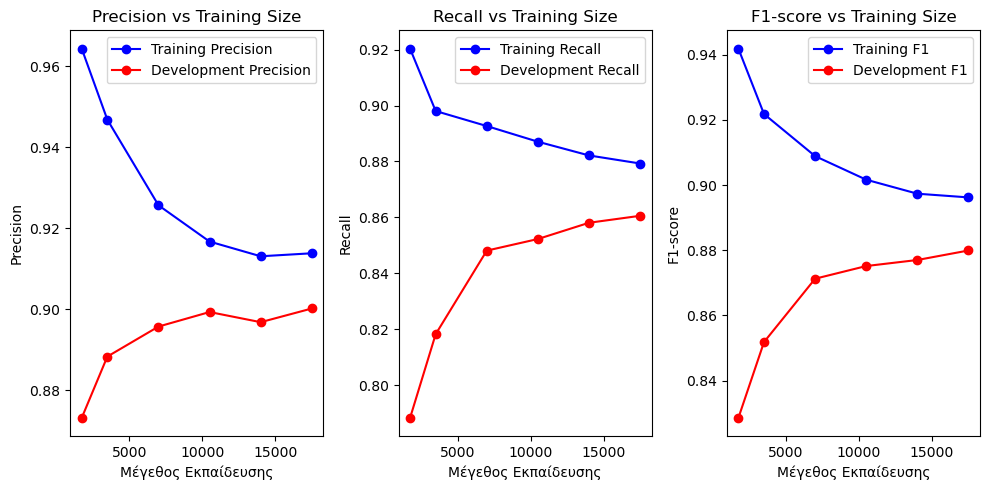

c:\Users\stroz\miniconda3\envs\numenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\stroz\miniconda3\envs\numenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\stroz\miniconda3\envs\numenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\stroz\miniconda3\envs\numenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\stroz\miniconda3\envs\numenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\stroz\miniconda3\envs\numenv\lib\sit

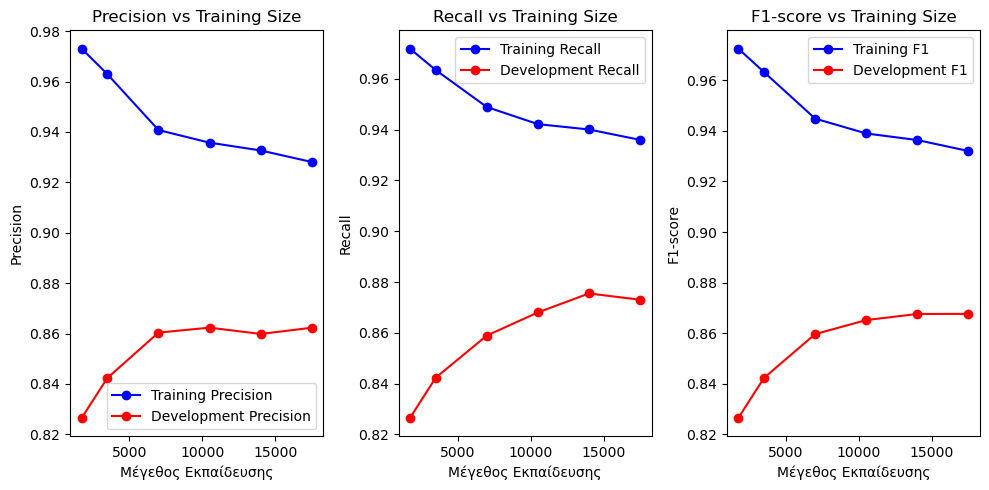

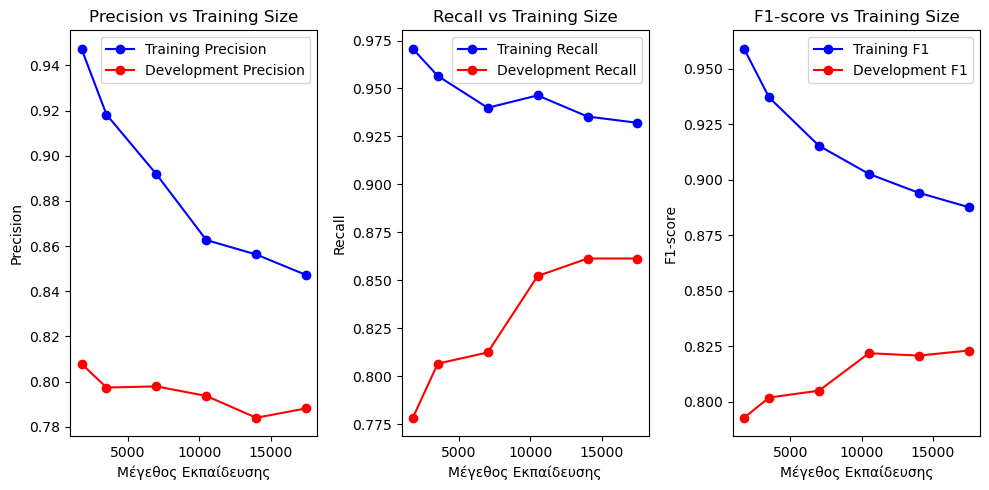

In [57]:
#ΜΕΡΟΣ Β
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

def evaluate_model(model):
    train_precisions, train_recalls, train_f1s = [], [], []
    dev_precisions, dev_recalls, dev_f1s = [], [], []

    total_samples = X_train.shape[0]
    train_sample_sizes = [int(size * total_samples) for size in train_sizes]

    for size in train_sample_sizes:
        model.fit(X_train[:size], y_train[:size])
        y_train_pred = model.predict(X_train[:size])
        y_dev_pred = model.predict(X_dev)

        # Υπολογισμός μετρικών
        train_precisions.append(precision_score(y_train[:size], y_train_pred))
        train_recalls.append(recall_score(y_train[:size], y_train_pred))
        train_f1s.append(f1_score(y_train[:size], y_train_pred))
        
        dev_precisions.append(precision_score(y_dev, y_dev_pred))
        dev_recalls.append(recall_score(y_dev, y_dev_pred))
        dev_f1s.append(f1_score(y_dev, y_dev_pred))

    # --- Δημιουργία Καμπυλών ---
    plt.figure(figsize=(10,5))
   
    plt.subplot(1,3,1)
    plt.plot(train_sample_sizes, train_precisions, label="Training Precision", marker="o", color="blue")
    plt.plot(train_sample_sizes, dev_precisions, label="Development Precision", marker="o", color="red")
    plt.xlabel("Μέγεθος Εκπαίδευσης")
    plt.ylabel("Precision")
    plt.legend()
    plt.title("Precision vs Training Size")

    plt.subplot(1,3,2)
    plt.plot(train_sample_sizes, train_recalls, label="Training Recall", marker="o", color="blue")
    plt.plot(train_sample_sizes, dev_recalls, label="Development Recall", marker="o", color="red")
    plt.xlabel("Μέγεθος Εκπαίδευσης")
    plt.ylabel("Recall")
    plt.legend()
    plt.title("Recall vs Training Size")

    plt.subplot(1,3,3)
    plt.plot(train_sample_sizes, train_f1s, label="Training F1", marker="o", color="blue")
    plt.plot(train_sample_sizes, dev_f1s, label="Development F1", marker="o", color="red")
    plt.xlabel("Μέγεθος Εκπαίδευσης")
    plt.ylabel("F1-score")
    plt.legend()
    plt.title("F1-score vs Training Size")

    plt.tight_layout()
    plt.show()

evaluate_model(MultinomialNB())
evaluate_model(LogisticRegression(
    solver='saga', # Για στοχαστική ανάβαση με υποστήριξη L2 κανονικοποίησης
    max_iter=10,             
    C=1000,   #Αντίστροφoς όρος της ομαλοποίησης (1/λ)
    tol=1e-4, #Όριο σύγκλισης (επιλογή προεπιλογής)
))
evaluate_model(RandomForestClassifier(n_estimators=100, max_depth=15 random_state=42))


In [71]:
#ΠΙΝΑΚΕΣ ΜΕΡΟΣ Β
from sklearn.metrics import classification_report, precision_recall_fscore_support
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def evaluate_sklearn_model(model):
    # Εκπαίδευση του μοντέλου χρησιμοποιώντας ΟΛΑ τα δεδομένα εκπαίδευσης
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Υπολογισμός μετρικών (Precision, Recall, F1)
    report = classification_report(y_test, y_test_pred, output_dict=True)

    # Υπολογισμός micro-average
    micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(
        y_test, y_test_pred, average='micro')

    # Δημιουργία ενός dictionary για το micro average
    micro_avg = {
        'precision': micro_precision,
        'recall': micro_recall,
        'f1-score': micro_f1,
        'support': len(y_test)  
    }

    # Ενημέρωση του report με το micro average
    report['micro avg'] = micro_avg

    # Μετατροπή σε DataFrame για πιο ευανάγνωστο πίνακα
    df_report = pd.DataFrame(report).transpose()

    # Εμφάνιση αποτελεσμάτων
    display(df_report)

# Εκτέλεση της συνάρτησης για κάθε διαθέσιμο αλγόριθμο του Scikit-learn
evaluate_sklearn_model(MultinomialNB())
evaluate_sklearn_model(LogisticRegression(
    solver='saga', # Για στοχαστική ανάβαση με υποστήριξη L2 κανονικοποίησης
    max_iter=10,             
    C=1000,   #Αντίστροφoς όρος της ομαλοποίησης (1/λ)
    tol=1e-4, #Όριο σύγκλισης (επιλογή προεπιλογής)
))
evaluate_sklearn_model(RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42))

,precision,recall,f1-score,support
0,0.867670,0.905030,0.885956,2485.0000
1,0.901993,0.863618,0.882389,2515.0000
accuracy,0.884200,0.884200,0.884200,0.8842
macro avg,0.884832,0.884324,0.884173,5000.0000
weighted avg,0.884935,0.884200,0.884162,5000.0000
micro avg,0.884200,0.884200,0.884200,5000.0000


c:\Users\stroz\miniconda3\envs\numenv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,precision,recall,f1-score,support
0,0.893176,0.884909,0.889024,2485.0000
1,0.887313,0.895427,0.891352,2515.0000
accuracy,0.890200,0.890200,0.890200,0.8902
macro avg,0.890245,0.890168,0.890188,5000.0000
weighted avg,0.890227,0.890200,0.890195,5000.0000
micro avg,0.890200,0.890200,0.890200,5000.0000


,precision,recall,f1-score,support
0,0.852766,0.806439,0.828956,2485.0000
1,0.818491,0.862425,0.839884,2515.0000
accuracy,0.834600,0.834600,0.834600,0.8346
macro avg,0.835628,0.834432,0.834420,5000.0000
weighted avg,0.835525,0.834600,0.834452,5000.0000
micro avg,0.834600,0.834600,0.834600,5000.0000


Μέσο μήκος κειμένων: 62
Training GRU...
Epoch:    0 / 10 | Training Loss: 190.36482, Validation Loss: 23.20672
Epoch:    2 / 10 | Training Loss: 92.36010, Validation Loss: 23.72780
Epoch:    4 / 10 | Training Loss: 50.49787, Validation Loss: 29.96939
Epoch:    6 / 10 | Training Loss: 28.67224, Validation Loss: 34.07770
Epoch:    8 / 10 | Training Loss: 17.44281, Validation Loss: 41.72163
Training LSTM...
Epoch:    0 / 10 | Training Loss: 190.32057, Validation Loss: 23.74756
Epoch:    2 / 10 | Training Loss: 92.83416, Validation Loss: 23.77748
Epoch:    4 / 10 | Training Loss: 53.28070, Validation Loss: 27.60052
Epoch:    6 / 10 | Training Loss: 32.50366, Validation Loss: 30.50002
Epoch:    8 / 10 | Training Loss: 19.06966, Validation Loss: 37.58386
  Model  Precision_0  Recall_0      F1_0  Precision_1  Recall_1      F1_1  \
0   GRU     0.875865  0.865996  0.870902     0.869052  0.878728  0.873863   
1  LSTM     0.893474  0.853924  0.873251     0.861714  0.899404  0.880156   

   Accura

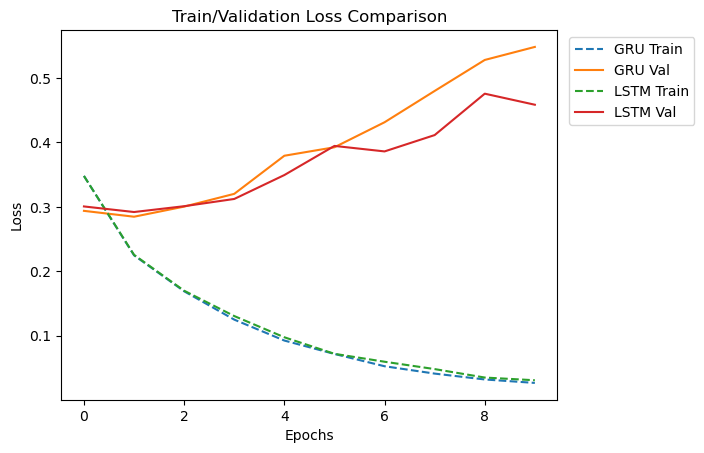

In [70]:
#ΜΕΡΟΣ Γ
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support
import re
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
texts_train = [" ".join(text) for text in vectorizer.inverse_transform(X_train)]
texts_dev = [" ".join(text) for text in vectorizer.inverse_transform(X_dev)]
texts_test = [" ".join(text) for text in vectorizer.inverse_transform(X_test)]

# Υπολογισμός του μέσου μήκους των κειμένων
avg_length = int(np.mean([len(re.sub(r'[^a-zA-Z]', ' ', text.lower()).split()) for text in texts_train]))


# Εκτύπωση του αποτελέσματος
print(f"Μέσο μήκος κειμένων: {avg_length}")
# Load Word2Vec embeddings using gensim downloader
word2vec = api.load('word2vec-google-news-300')

# Map custom vocabulary to Word2Vec indices with 'PAD' and 'UNK' tokens
embedding_dim = 300
average_embedding = np.mean(word2vec.vectors, axis=0)  # average of all embeddings
vocab = {'PAD': 0, 'UNK': 1}
vocab.update({word: idx + 2 for idx, word in enumerate(top_m_words)})
embedding_matrix = np.zeros((len(vocab), embedding_dim))
embedding_matrix[0] = np.zeros(embedding_dim)  # PAD token embedding
embedding_matrix[1] = average_embedding  # UNK token embedding
for word, idx in vocab.items():
    if word in word2vec:
        embedding_matrix[idx] = word2vec[word]
    elif idx > 1:
        embedding_matrix[idx] = average_embedding

# Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_length):
        self.texts = [self.tokenize(text, vocab, max_length) for text in texts]
        self.labels = labels

    def tokenize(self, text, vocab, max_length):
        if isinstance(text, list):  #Αν είναι λίστα, μετατρέπεται σε string
            text = " ".join(text)
        text = re.sub(r'[^a-zA-Z]', ' ', text.lower()).split()
        tokens = [vocab.get(word, vocab['UNK']) for word in text]
        if len(tokens) < max_length:
            tokens += [vocab['PAD']] * (max_length - len(tokens))
        else:
            tokens = tokens[:max_length]
        return tokens

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx]), torch.tensor(self.labels[idx])

y_train = np.array(y_train)
y_dev = np.array(y_dev)
y_test = np.array(y_test)
train_dataset = TextDataset(texts_train, y_train, vocab, avg_length)
val_dataset = TextDataset(texts_dev, y_dev, vocab, avg_length)
test_dataset = TextDataset(texts_test, y_test, vocab, avg_length)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define RNN, GRU, and LSTM models with optional Global Max Pooling
class StackedRNNModel(nn.Module):
    def __init__(self, vocab_size,
                 embed_dim, hidden_dim, output_dim,
                 model_type='RNN',num_layers=2,
                 pretrained=True, freeze=False, use_pooling=True, dropout_rate=0.3):
        super(StackedRNNModel, self).__init__()
        self.use_pooling = use_pooling
        self.num_layers = num_layers
        self.dropout_rate = dropout_rate
        if pretrained:
            self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=freeze)
        else:
            self.embedding = nn.Embedding(vocab_size, embed_dim)
        
        self.dropout_embedding = nn.Dropout(self.dropout_rate)  
        rnn_class = {'RNN': nn.RNN, 'GRU': nn.GRU, 'LSTM': nn.LSTM}[model_type]
        self.rnn = rnn_class(embed_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True, dropout=self.dropout_rate)
        self.dropout_rnn = nn.Dropout(self.dropout_rate)  
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = self.dropout_embedding(embedded)
        output, _ = self.rnn(embedded)
        output = self.dropout_rnn(output)  
        if self.use_pooling:
            pooled = torch.max(output, dim=1)[0]
            return torch.sigmoid(self.fc(pooled))
        else:
            return torch.sigmoid(self.fc(output[:, -1, :]))
    # Training and Evaluation Functions remain unchanged

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for texts, labels in train_loader:
            optimizer.zero_grad()
            texts = texts.to(device)
            labels = labels.float().to(device)
            outputs = model(texts).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for texts, labels in val_loader:
                texts = texts.to(device)
                labels = labels.float().to(device)
                outputs = model(texts).squeeze()
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))

        if epoch % 2 == 0:
            print(f'Epoch: {epoch:4.0f} / {epochs} | Training Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}')

    return train_losses, val_losses

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for texts, labels in test_loader:
            texts = texts.to(device)
            preds = model(texts).squeeze() > 0.5
            y_true.extend(labels.tolist())
            y_pred.extend(preds.tolist())
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1, y_true, y_pred

# Instantiate models and train
models = {
    'GRU': StackedRNNModel(len(vocab), 300, 32, 1, 'GRU',num_layers=2),
    'LSTM': StackedRNNModel(len(vocab), 300, 32, 1, 'LSTM',num_layers=2)
}

results = {}
summary_results = []
epochs = 10

for name, model in models.items():
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print(f"Training {name}...")
    train_losses, val_losses = train_model(model.float().to(device), train_loader, val_loader,
                                           criterion, optimizer, epochs=epochs)
    results[name] = {'train_loss': train_losses, 'val_loss': val_losses}
    acc, prec, rec, f1, y_true, y_pred = evaluate_model(model, test_loader)
    results[name].update({'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1})


     # Υπολογισμός αναλυτικών μετρικών για κάθε κατηγορία
    precision_0 = precision_score(y_true, y_pred, pos_label=0)
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    f1_0 = f1_score(y_true, y_pred, pos_label=0)

    precision_1 = precision_score(y_true, y_pred, pos_label=1)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)
    f1_1 = f1_score(y_true, y_pred, pos_label=1)

    # Μέσοι όροι
    macro_precision = precision_score(y_true, y_pred, average='macro')
    macro_recall = recall_score(y_true, y_pred, average='macro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')

    micro_precision = precision_score(y_true, y_pred, average='micro')
    micro_recall = recall_score(y_true, y_pred, average='micro')
    micro_f1 = f1_score(y_true, y_pred, average='micro')

    # Προσθήκη των αποτελεσμάτων στη λίστα
    summary_results.append([name, precision_0, recall_0, f1_0, precision_1, recall_1, f1_1,
                            acc, macro_precision, macro_recall, macro_f1,
                            micro_precision, micro_recall, micro_f1])

# Δημιουργία DataFrame με τα αποτελέσματα
df_summary = pd.DataFrame(summary_results, columns=[
    'Model', 'Precision_0', 'Recall_0', 'F1_0', 'Precision_1', 'Recall_1', 'F1_1',
    'Accuracy', 'Macro_Precision', 'Macro_Recall', 'Macro_F1',
    'Micro_Precision', 'Micro_Recall', 'Micro_F1'
])

# Εκτύπωση του πίνακα
print(df_summary)

# Plot losses
for name in models:
    plt.plot(results[name]['train_loss'], linestyle='--', label=f'{name} Train')
    plt.plot(results[name]['val_loss'], label=f'{name} Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train/Validation Loss Comparison')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

